Plot generated, but not saved (using dummy data).


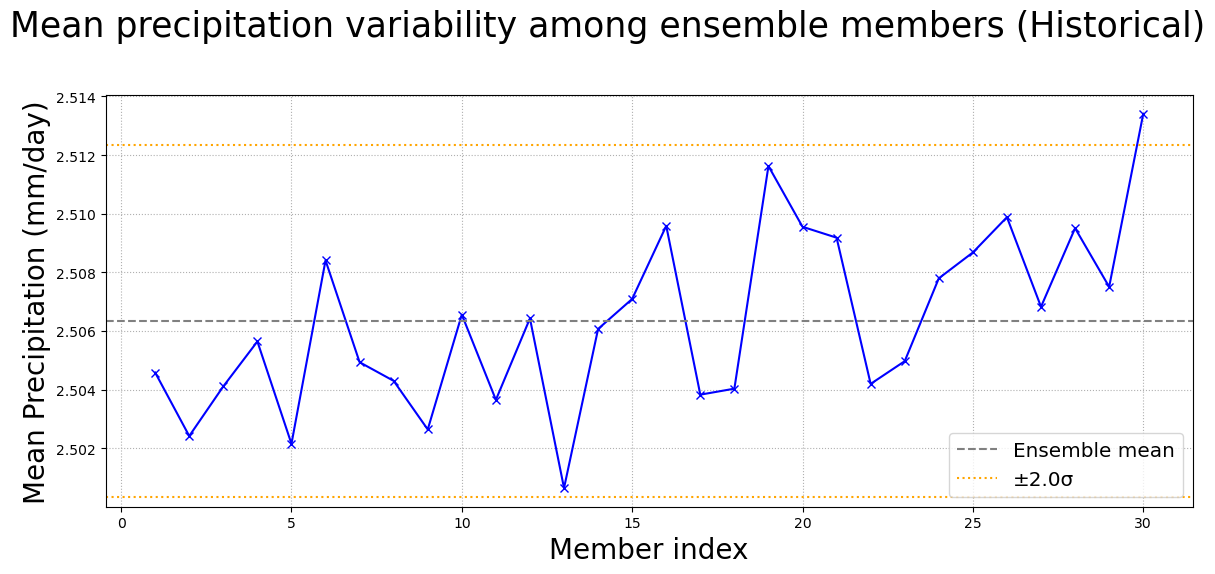

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os 

# --- 1. Load Your Data ---
# This script assumes 'ensemble_member_total_stats.csv' exists
# in the same directory (generated by the previous Dask script).
csv_filename = '/nbhome/Soelem.Bhuiyan/basic_QA_SPEARMED_precip/outputs/tables/ensemble_member_stats_fut.csv'

try:
    df = pd.read_csv(csv_filename)
except FileNotFoundError:
    print(f"Error: '{csv_filename}' not found.")
    print("Please make sure the file is in the same directory as the script.")
    # Create a dummy dataframe to allow script to run without error for syntax checking
    df = pd.DataFrame({
        'member': ['pp_ens_01', 'pp_ens_02'],
        'mean_precip_mm_day': [5000.0, 5200.0],
        'std_dev_mm': [100.0, 120.0]
    })

# --- 2. Data Preprocessing & Statistics ---

# Extract member index number for plotting
if 'member' in df.columns:
    df['member_index'] = df['member'].str.split('_').str[-1].astype(int)
    df = df.sort_values('member_index').reset_index(drop=True)
else:
    # Handle case where file wasn't loaded
    df['member_index'] = df.index

# Calculate the key ensemble statistics for TOTAL precipitation
# Note: We use 'total_precip_mm' which comes from the Dask script
ensemble_mean_total = df['mean_precip_mm_day'].mean()
ensemble_std_of_totals = df['mean_precip_mm_day'].std() # Variability between members

# --- 3. Plot: Ensemble Total per Member ---

# Define the threshold (in Z-score) for flagging a member
HEALTH_THRESHOLD_Z = 2.0 

# Create the figure and *one* subplot
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Mean precipitation variability among ensemble members (Historical)', fontsize=25)

## --- Main Plot: Total per Member ---
ax1.set_xlabel('Member index', fontsize=20)
ax1.set_ylabel('Mean Precipitation (mm/day)', fontsize=20)

# Plot ALL members using the 'normal' style ('x-' in blue)
ax1.plot(df['member_index'], df['mean_precip_mm_day'], 'x-', color='blue', label='_nolegend_')


# Plot ensemble mean line (Mean of the totals)
ax1.axhline(ensemble_mean_total, color='grey', linestyle='--', label='Ensemble mean')

# Plot threshold lines based on the standard deviation of the totals
threshold_line_color = 'orange'
ax1.axhline(ensemble_mean_total + HEALTH_THRESHOLD_Z * ensemble_std_of_totals, 
            color=threshold_line_color, linestyle=':', 
            label=f'±{HEALTH_THRESHOLD_Z}σ')
ax1.axhline(ensemble_mean_total - HEALTH_THRESHOLD_Z * ensemble_std_of_totals, 
            color=threshold_line_color, linestyle=':',
            label='_nolegend_')

ax1.legend(fontsize='x-large')
ax1.grid(True, linestyle=':')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for main title

# Only save if we loaded the real file
if 'member' in df.columns and 'total_precip_mm' in df.columns:
    output_file = "ensemble_mean_plot_fut.png"
    plt.savefig(output_file)
    print(f"Saved {output_file}")
else:
    print("Plot generated, but not saved (using dummy data).")

# plt.show() # Use plt.show() to display interactively